### Linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature (Independent Variable)
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (Dependent Variable)

In [15]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create and train the linear regression model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [24]:
# The learned intercept (b_0)
# The learned coefficient(s) (b_1)
print(model.intercept_  )
print(model.coef_ )

[4.14291332]
[[2.79932366]]


In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
# Print results
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Intercept: 4.142913319458568
Coefficient: 2.7993236574802753
Mean Squared Error: 0.6536995137170016
R² Score: 0.8072059636181393


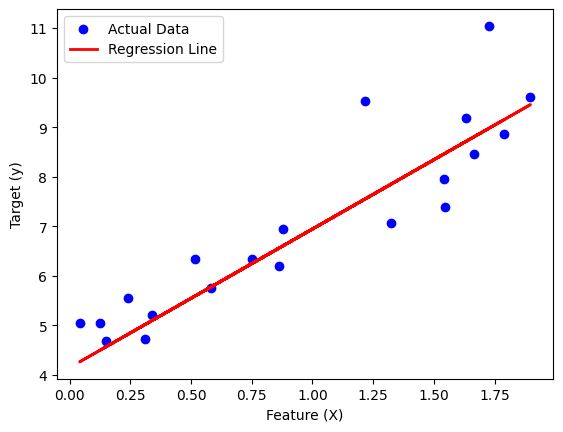

In [22]:
# Plot the results
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

### Gradient Boosting

Mean Squared Error: 0.6527
R² Score: 0.8075


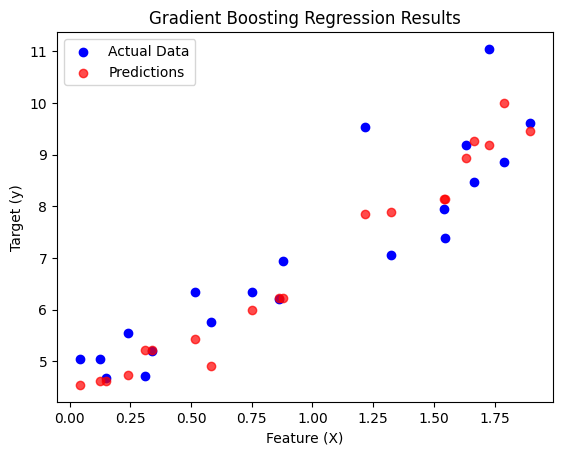

In [26]:
# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature (Independent Variable)
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (Dependent Variable)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train.ravel())  # ravel() is used to convert y_train to a 1D array

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.scatter(X_test, y_pred, color='red', label="Predictions", alpha=0.7)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.title("Gradient Boosting Regression Results")
plt.show()

In [29]:
gbr.train_score_

array([2.96025214, 2.51798983, 2.1599598 , 1.86892094, 1.6323421 ,
       1.43991568, 1.27610546, 1.14489714, 1.03036638, 0.93296805,
       0.85761768, 0.78969805, 0.73486489, 0.68759053, 0.64798808,
       0.61416022, 0.58578488, 0.56004125, 0.53976895, 0.51935541,
       0.49987689, 0.47595562, 0.46308039, 0.44945772, 0.43870318,
       0.41808551, 0.40360263, 0.39479697, 0.37675489, 0.36600784,
       0.35578982, 0.34210155, 0.33349247, 0.32617167, 0.31380156,
       0.30205466, 0.2978363 , 0.28820023, 0.2848033 , 0.27791668,
       0.27517576, 0.26585347, 0.26177262, 0.25959881, 0.25465521,
       0.24590294, 0.2441607 , 0.23717406, 0.23576823, 0.23218941,
       0.22768433, 0.22654613, 0.21900419, 0.21441369, 0.21349502,
       0.21095684, 0.20375197, 0.196906  , 0.19243831, 0.19050958,
       0.18972226, 0.18614962, 0.18392565, 0.18028426, 0.17964477,
       0.17495803, 0.17356559, 0.16976279, 0.16921041, 0.16807892,
       0.16553242, 0.16462819, 0.16418352, 0.16097772, 0.15859

In [1]:
import duckdb
import pandas as pd

from datetime import timedelta
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Connect to an in-memory DuckDB instance
con = duckdb.connect()

# Attach the PostgreSQL database
con.execute("""
    ATTACH 'dbname=stocks_brain_trust user=gmarr password=MTia100%s2025!! host=gmarrdb.postgres.database.azure.com port=5432'
    AS db (TYPE postgres, READ_ONLY);
""")

# Query a table from PostgreSQL
df = con.execute("SELECT * FROM db.stock__price WHERE stocksymbol = 'MSFT' ").fetchdf()

# # Display the retrieved DataFrame
# print(df)

In [30]:
aapl_25 = duckdb.sql("""
           SELECT 
            date::DATE as formatted_date,
           stocksymbol, close 
           FROM df
           WHERE date::DATE >='2024-01-01'
           ORDER BY date desc
""").df()

In [3]:
stock_df_aapl = duckdb.sql("""
           SELECT 
            date::DATE as formatted_date,
           stocksymbol, close 
           FROM df
           WHERE date::DATE >='2024-01-01'
           ORDER BY date desc
""").df()

In [4]:
# Fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
model = LinearRegression()

# Prepare the data for regression
stock_df_aapl['days'] = (stock_df_aapl['formatted_date'] - stock_df_aapl['formatted_date'].min()).dt.days

X = stock_df_aapl[['days']]
y = stock_df_aapl['close']

In [7]:
y

0      378.77
1      383.27
2      380.45
3      380.16
4      393.31
        ...  
295    374.69
296    367.75
297    367.94
298    370.60
299    370.87
Name: close, Length: 300, dtype: float64

In [55]:
# Fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [58]:
# Predict for the next 2 months
future_dates = [stock_df_aapl['formatted_date'].max() + timedelta(days=i) for i in range(1, 61)]
future_days = [(date - stock_df_aapl['formatted_date'].min()).days for date in future_dates]
future_X = poly.transform(np.array(future_days).reshape(-1, 1))
future_predictions = model.predict(future_X)

# Create a DataFrame with the predictions
future_df = pd.DataFrame({
    'formatted_date': future_dates,
    'predicted_close': future_predictions
})

# Combine the original and future data
combined_df = pd.concat([
    aapl_25[['form`atted_date', 'close']].rename(columns={'close': 'predicted_close'}),
    future_df
], ignore_index=True)

/Users/gerardomartinez/DataEng/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [59]:
combined_df

,formatted_date,predicted_close
0,2025-03-12,209.680000
1,2025-03-11,216.980000
2,2025-03-10,220.840000
3,2025-03-09,227.480000
4,2025-03-06,239.070000
...,...,...
355,2025-05-07,249.129741
356,2025-05-08,249.202292
357,2025-05-09,249.274461
358,2025-05-10,249.346248


In [48]:
# Predict for the next 2 months
future_dates = [aapl_25['formatted_date'].max() + timedelta(days=i) for i in range(1, 61)]
future_days = [(date - aapl_25['formatted_date'].min()).days for date in future_dates]

In [45]:
future_X = poly.transform(np.array(future_days).reshape(-1, 1))
future_predictions = model.predict(future_X)

# Create a DataFrame with the predictions
future_df = pd.DataFrame({
    'formatted_date': future_dates,
    'predicted_close': future_predictions
})

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
X_poly = poly.fit_transform(X)
model.fit(X_poly, y)

# Add a column for the regression line
stock_df_aapl['regression_line'] = model.predict(X_poly)

# Add columns for mean, median, +1 std dev, and -1 std dev
mean_close = stock_df_aapl['close'].mean()
median_close = stock_df_aapl['close'].median()
std_dev_close = stock_df_aapl['close'].std()

stock_df_aapl['mean_close'] = mean_close
stock_df_aapl['median_close'] = median_close
stock_df_aapl['plus_1_std_dev'] = mean_close + std_dev_close
stock_df_aapl['minus_1_std_dev'] = mean_close - std_dev_close

# Add a column for the z-score
stock_df_aapl['z_score'] = (stock_df_aapl['close'] - mean_close) / std_dev_close

,formatted_date,stocksymbol,close
0,2025-03-12,AAPL,209.68
1,2025-03-11,AAPL,216.98
2,2025-03-10,AAPL,220.84
3,2025-03-09,AAPL,227.48
4,2025-03-06,AAPL,239.07
...,...,...,...
295,2024-01-07,AAPL,185.56
296,2024-01-04,AAPL,181.18
297,2024-01-03,AAPL,181.91
298,2024-01-02,AAPL,184.25


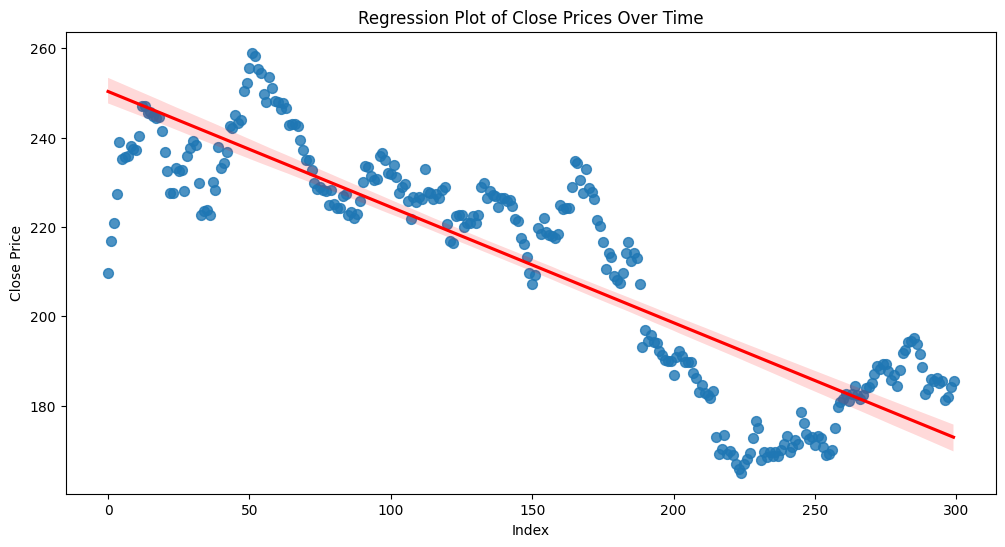

/Users/gerardomartinez/DataEng/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


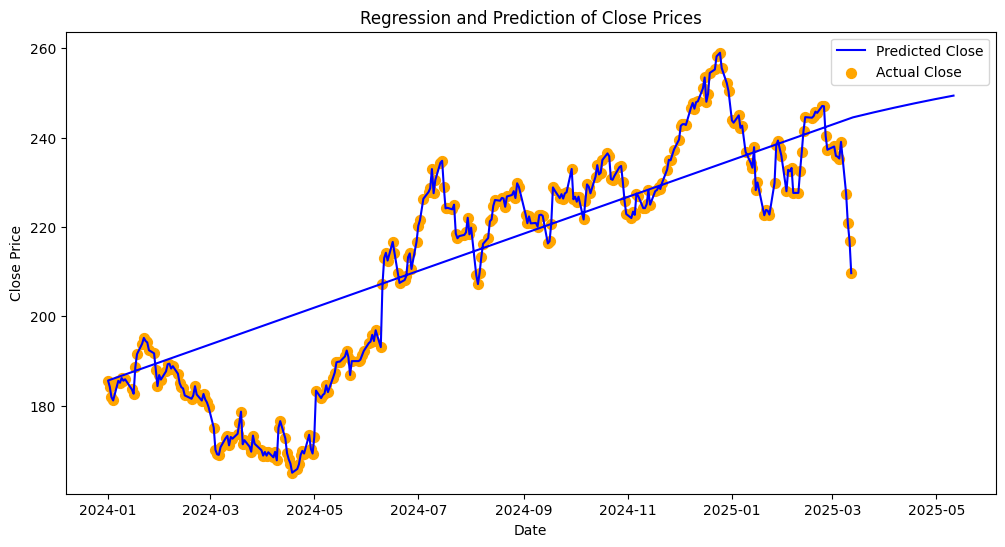

In [31]:
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

# Plot a regression line for 'formatted_date' vs 'close'
plt.figure(figsize=(12, 6))
sns.regplot(x=aapl_25.index, y='close', data=aapl_25, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot of Close Prices Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.show()
# Prepare the data for regression
aapl_25['days'] = (aapl_25['formatted_date'] - aapl_25['formatted_date'].min()).dt.days
X = aapl_25[['days']]
y = aapl_25['close']

# Fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predict for the next 2 months
future_dates = [aapl_25['formatted_date'].max() + timedelta(days=i) for i in range(1, 61)]
future_days = [(date - aapl_25['formatted_date'].min()).days for date in future_dates]
future_X = poly.transform(np.array(future_days).reshape(-1, 1))
future_predictions = model.predict(future_X)

# Create a DataFrame with the predictions
future_df = pd.DataFrame({
    'formatted_date': future_dates,
    'predicted_close': future_predictions
})

# Combine the original and future data
combined_df = pd.concat([
    aapl_25[['formatted_date', 'close']].rename(columns={'close': 'predicted_close'}),
    future_df
], ignore_index=True)

# Plot the combined data
plt.figure(figsize=(12, 6))
plt.plot(combined_df['formatted_date'], combined_df['predicted_close'], label='Predicted Close', color='blue')
plt.scatter(aapl_25['formatted_date'], aapl_25['close'], color='orange', label='Actual Close', s=50)
plt.title('Regression and Prediction of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()